In [72]:
"""@author Okorie Ndubuisi June 2025"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from logisticregression import LogisticRegression # import my implementation of logistic regression
import seaborn as sns
import pandas as pd
sns.set_theme()

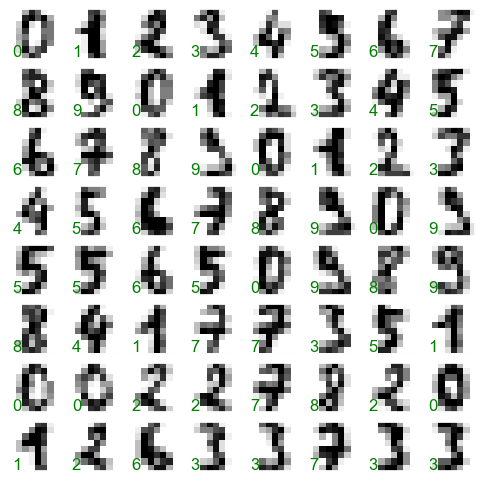

In [31]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])
    axi.text(0.05, 0.05, str(digits.target[i]), transform=axi.transAxes, color='green')

In [3]:
X_test = np.array(digits.data[:200, :], dtype=np.float64)
Y_test = digits.target[:200]

X = digits.data[200:, :]
Y = digits.target[200:]

In [4]:
X.shape

(1597, 64)

In [5]:
Y.shape

(1597,)

In [6]:
model = LogisticRegression()

In [7]:
lambda_ = 1
decimals = 8

In [8]:
model.fit(X, Y, learning_rate=1e-4, optimizer='adam', decay=False, 
              batch_size=-1, epochs=65, lambda_=lambda_, bias=True, verbose=False)

In [9]:
model.params['weights'][:5]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.02055249,  0.02055222,  0.02055274,  0.02055274, -0.02045807,
         0.02055274, -0.02046677,  0.02055271,  0.0205527 ,  0.02055271],
       [ 0.02055275,  0.02055275,  0.02055275,  0.02055275,  0.02055274,
         0.02055275,  0.02055274,  0.02055275,  0.02055275,  0.02055275],
       [ 0.02055275,  0.02055275,  0.02055275,  0.02055275,  0.02055275,
         0.02055275,  0.02055275,  0.02055275,  0.02055275,  0.02055275],
       [ 0.02055275,  0.02055275,  0.02055275,  0.02055275,  0.02055275,
         0.02055275,  0.02055275,  0.02055275,  0.02055275,  0.02055275]])

In [10]:
model.params['bias']

array([[0.02055274, 0.02055274, 0.02055274, 0.02055274, 0.02055274,
        0.02055274, 0.02055274, 0.02055274, 0.02055274, 0.02055274]])

In [11]:
X_test.shape

(200, 64)

In [12]:
test_predictions = model.predict(X_test, -1)

In [13]:
print(test_predictions.shape)

(200,)


Let compute the test accuracy of our model, our model is about 83% accurate.

In [14]:
test_accuracy = (len(Y_test[np.where(Y_test == test_predictions)]) / len(Y_test)) * 100
test_accuracy

83.5

In [73]:
accuracy_score(Y_test, test_predictions)

0.835

Let us verify this by viewing and comparing the first 10 predictions of our model with the first 10 values of the y test ground truth label.

In [15]:
print('First 10 predictions of our model:', test_predictions[:10])
print('First 10 values of y test label:  ', Y_test[:10])

First 10 predictions of our model: [0 1 8 3 4 9 6 7 8 9]
First 10 values of y test label:   [0 1 2 3 4 5 6 7 8 9]


In [65]:
idx = np.where(Y_test != test_predictions)
correct_labels = Y_test[idx]
incorrect_labels = test_predictions[idx]
Incorrect_X = X[idx]
incorrect_img = digits.images[idx]

In [55]:
incor_len = len(incorrect_labels)
incor_len

33

In [37]:
correct_labels = Y_test[Y_test == test_predictions]

In [38]:
len(correct_labels)

167

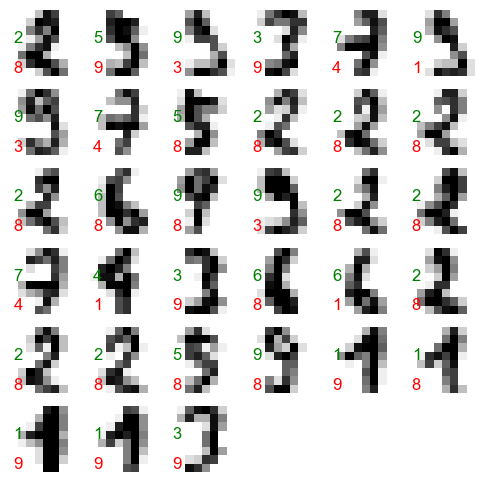

In [66]:
fig, ax = plt.subplots(6, 6, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.axis('off')
    if i >= len(incorrect_labels):
        continue
    axi.imshow(incorrect_img[i], cmap='binary')
    axi.text(0.05, 0.05, str(incorrect_labels[i]), transform=axi.transAxes, color='red')
    axi.text(0.05, 0.5, str(correct_labels[i]), transform=axi.transAxes, color='green')

We can see that our 10 our model predicted 8 correctly. It failed in the third and sixth where it predicted 8 and 9 respectively
but the y test actually gives us 2 and 5 respectively. This is about 80% accurate i.e. (8 * 100) / 10 = 80

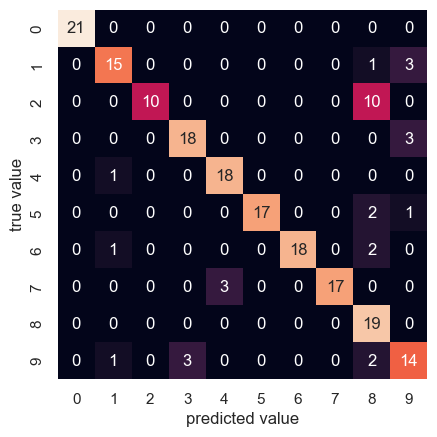

In [70]:
confusion_mat = confusion_matrix(Y_test, test_predictions)
sns.heatmap(confusion_mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

From the confusion the  heatmap of the confusion matrix, we can see that our model has problem in predicting 2, as it made mistake 10 times predicting it as 8. However, it predicted 0 with an absolute certainty.

Let us check if our model is overfitting by predicting the train X and comparing the predictions with y train label.

In [16]:
train_predictions = model.predict(X, -1)

In [17]:
train_accuracy = (len(Y[np.where(Y == train_predictions)]) / len(Y)) * 100
train_accuracy

84.78396994364434

In [61]:
correct_labels = Y[Y == train_predictions]

In [62]:
len(correct_labels)

1354

In [63]:
incorrect_labels = Y[Y != train_predictions]

In [64]:
len(incorrect_labels)

243

We can see our model still maintain about the same accuracy in both test and train predictions. We safely conclude that our model is 
performing well.

In [18]:
print('First 10 predictions of our model on train X:', train_predictions[:10])
print('First 10 values of y train label:            ', Y[:10])

First 10 predictions of our model on train X: [1 5 0 9 5 8 8 2 0 0]
First 10 values of y train label:             [1 5 0 9 5 2 8 2 0 0]


We can see that our 10 our model predicted 9 correctly. It failed in the sixth value where it predicted 8 instead of 2 that the y train actually gives us. This is about 90% accurate i.e. (9 * 100) / 10 = 90

Our model is really fitting the datal well.

In [19]:
best_weights, best_bias, lowest_cost, best_iteration = model.get_best_params()

In [20]:
lowest_cost

4.8377355879158745

In [21]:
best_bias[:5]

array([[0.00252957, 0.00252957, 0.00252957, 0.00252957, 0.00252957,
        0.00252957, 0.00252957, 0.00252957, 0.00252957, 0.00252957]])

In [22]:
best_weights[:5]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.00252954,  0.0025295 ,  0.00252957,  0.00252957, -0.00252479,
         0.00252957, -0.0025248 ,  0.00252956,  0.00252956,  0.00252956],
       [ 0.00252957,  0.00252957,  0.00252957,  0.00252957,  0.00252957,
         0.00252957,  0.00252957,  0.00252957,  0.00252957,  0.00252957],
       [ 0.00252957,  0.00252957,  0.00252957,  0.00252957,  0.00252957,
         0.00252957,  0.00252957,  0.00252957,  0.00252957,  0.00252957],
       [ 0.00252957,  0.00252957,  0.00252957,  0.00252957,  0.00252957,
         0.00252957,  0.00252957,  0.00252957,  0.00252957,  0.00252957]])

In [23]:
costs = np.array(model.costs)
costs.shape

(65,)

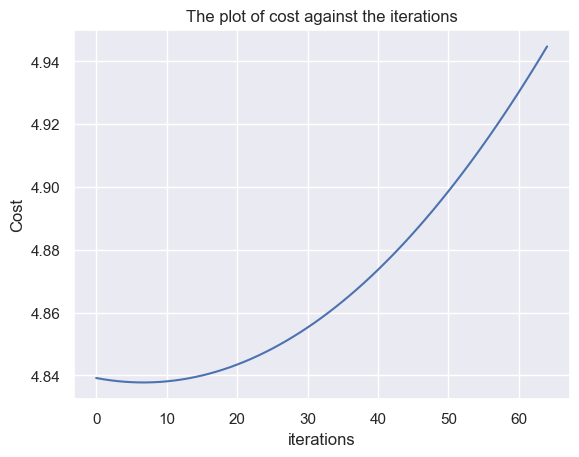

In [24]:
plt.plot(np.arange(len(model.iterations)), costs)
plt.title('The plot of cost against the iterations')
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.show();

In [25]:
model.save('handwritten_digits_model.pkl')

Model saved to handwritten_digits_model.pkl


In [26]:
loaded_model = model.load('handwritten_digits_model.pkl')

Model loaded from handwritten_digits_model.pkl


In [27]:
test_predictions = loaded_model.predict(X_test, -1)
test_accuracy = (len(Y_test[np.where(Y_test == test_predictions)]) / len(Y_test)) * 100
test_accuracy

83.5

In [28]:
train_predictions = loaded_model.predict(X, -1)
train_accuracy = (len(Y[np.where(Y == train_predictions)]) / len(Y)) * 100
train_accuracy

84.78396994364434